11501568/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


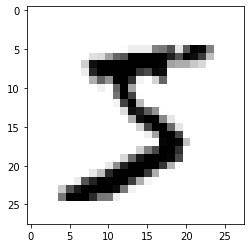

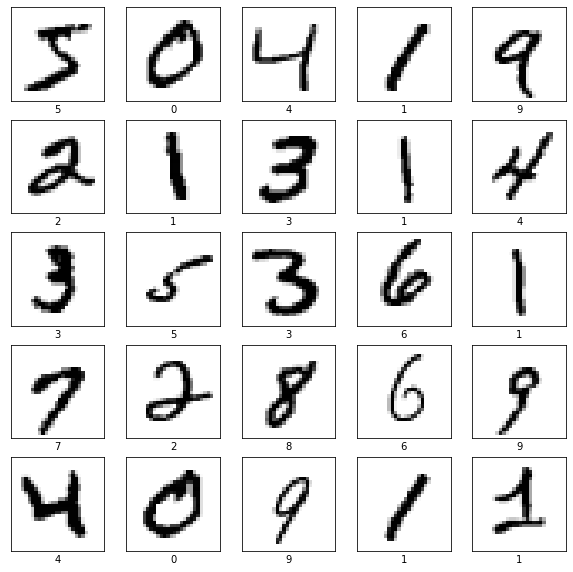

x_train shape (28, 28)
313/313 [==============================] - 1s 2ms/step - loss: 0.9473 - accuracy: 0.9059
Validation loss:  0.9472726583480835
Validation accuracy:  0.9059000015258789
predictions: (10000, 10)


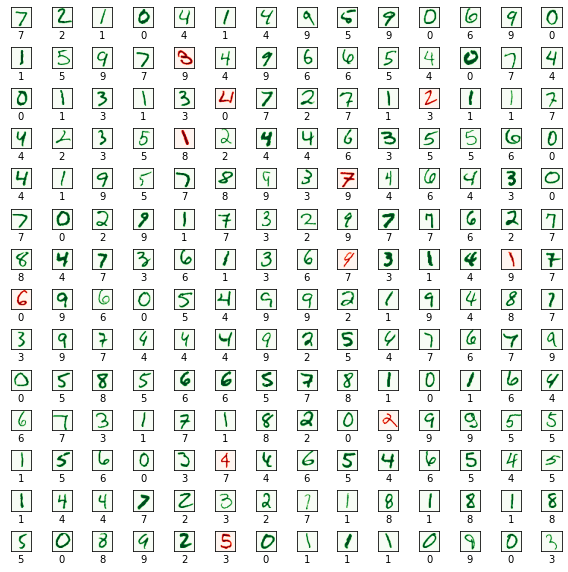

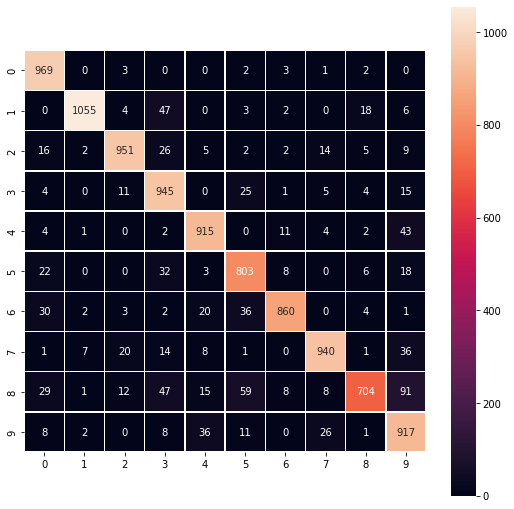

In [1]:
import numpy as np               # Import numpy library
import matplotlib.pyplot as plt  # Import mathplot library
import seaborn as sn             # Import seaborn library
import pandas as pd              # Import pandas library
import math                      # Import math library
import datetime                  # Import datetime library
from keras.datasets import mnist                 # Import MNIST dataset
from keras.models import Sequential              # Import Sequential class
from keras.layers import Dense, Flatten          # Import Dense, Flatten class
from keras import regularizers                   # Import regularizers
from tensorflow.keras.optimizers import Adam     # Import Adam optimizer
# Import spare categorical crossentroy loss
from keras.metrics import sparse_categorical_crossentropy
from keras.callbacks import TensorBoard          # Import TensorBoard class
from keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.math import confusion_matrix
from tensorflow.keras import activations
epochs = 1                       # Number of epochs to train the model

# x\_train is a numpy array of grayscale image data with shapes (60000, 28, 28)
# y\_train is a numpy array of digit labels (in range 0-9) with shape (60000,)
# x\_test is a numpy array of grayscale image data with shapes (10000, 28, 28)
# y\_test is a numpy array of digit labels (in range 0-9) with shape (10000,)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pring the data shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Show the pixel values (from 0 255) of
# the first image
pd.DataFrame(x_train[0])

# Show the image in binary form
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

numbers_to_display = 25     # Display 25 images
# Compute number of images per row
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10)) # Each image is in 10x10 pixels
# Show all the images
for i in range(numbers_to_display):
    # number of rows, number of columns, 
    # index (start from 1)
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])          # Remove all xticks
    plt.yticks([])          # Remove all yticks
    plt.grid(False)         # No grid lines
    # Display data as a binary image
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # Show training image labels
    plt.xlabel(y_train[i])
plt.show() # Show the figure

model = Sequential() # Create a Sequential object
# Add a flatten layer to convert the image data to a single column
model.add(Flatten(input_shape=x_train.shape[1:]))

print('x_train shape', x_train.shape[1:])

# Input layer
# Add a dense layer (fully-connected layer) and use ReLU activation function.
# This layer uses L2 loss, computed as l2 * reduce\_sum(square(x)), where l2 is 0.002
model.add(Dense(units=128,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.002)
))
# Hidden layer
# Add a dense layer (fully-connected layer) and use ReLU activation function.
# This layer uses L2 loss, computed as l2 * reduce\_sum(square(x)), where l2 is 0.002
model.add(Dense(units=128,
                activation=activations.relu,
                kernel_regularizer=regularizers.l2(0.002)
))
# Output layer
# Add a dense layer (fully-connected layer) and use softmax activation function.
model.add(Dense(units=10,
                activation='softmax'
))

plot_model(model,
           show_shapes=True,
           show_layer_names=True
)

# Create an Adam optimizer by creating an object
# Set learning rate to 0.001
adam_optimizer = Adam(learning_rate=0.001)

# Compile the model, i.e., configures the model for training
# Use crossentropy loss function since there are two or more label classes.
# Use adam algorithm (a stochastic gradient descent method)
# Use accuracy as metric, i.e., report on accuracy
model.compile(
    optimizer=adam_optimizer,
    loss=sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Create TensorBoard object to track experiment metrics like loss and
# accuracy, visualizing the model graph, etc.
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model, i.e., train the model
# Specify training data and labels
# Speicfy batch size, i.e., number of samples per gradient update
# Set verbose to 1, i.e., show progress bar
# Specify validation data, i.e., data on which to evaluate the loss
# Write TensorBoard logs after every batch of training to monitor our metrices
training_history = model.fit(x_train, y_train,
                             epochs=epochs,
                             validation_data=(x_test, y_test),
                             callbacks=[tensorboard_callback]
)

# Evaluate the model
# Specify test data and labels
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)
# Print loss and accuracy
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

loaded_model = load_model(model_name)

# Use the model to do prediction by specifying the image(s). 
# Get back a numpy array of prediction
predictions = loaded_model.predict([x_test])
print('predictions:', predictions.shape)

# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions)

# Let's extract predictions with highest probabilites and
# detect what digits have been actually recognized.
prediction_results = np.argmax(predictions, axis=1)

pd.DataFrame(prediction_results)

numbers_to_display = 196  # Display 196 images
# Compute number of images per row
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10)) # Each image is in size 10x10 pixels

# Show all the images
for i in range(numbers_to_display):    
    # number of rows, number of columns, index (start from 1)
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])   # Remove all xticks
    plt.yticks([])   # Remove all yticks
    plt.grid(False)  # No grid lines
    # Check if the prediction is correct. If so, display in green. Otherwise in red.
    color_map = 'Greens' if prediction_results[i] == y_test[i] else 'Reds'
    plt.imshow(x_test[i], cmap=color_map) # Display data as a color image
    plt.xlabel(prediction_results[i]) # Show predicted image labels

# Adjust the height of the padding between subplots to 1
# Adjust the width of the padding between subplots to 0.5
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show() # Show the figure

# Compute confusion matrix to evaluate the accuracy of a classification
# by creating a confusion\_matrix object.
# Specify true labels and prediction results
cm = confusion_matrix(y_test, prediction_results)
# Each image is in size 9x9 pixels
f, ax = plt.subplots(figsize=(9, 9))
# Draw heat map to show the magnitude in color
sn.heatmap(
    cm,            # Data
    annot=True,    # True (write the data in each cell)
    linewidths=.5, # Width of line that divides each cell
    fmt="d",       # Format of the data, decimal
    square=True,   # Make cell as square-shaped
    ax=ax          # Draw it on ax
)
plt.show()         # Show the figure